In [9]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from IPython.display import display
plt.rc('font', family='Verdena')

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

C:\Sneg\Add.Program\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['Verdena'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


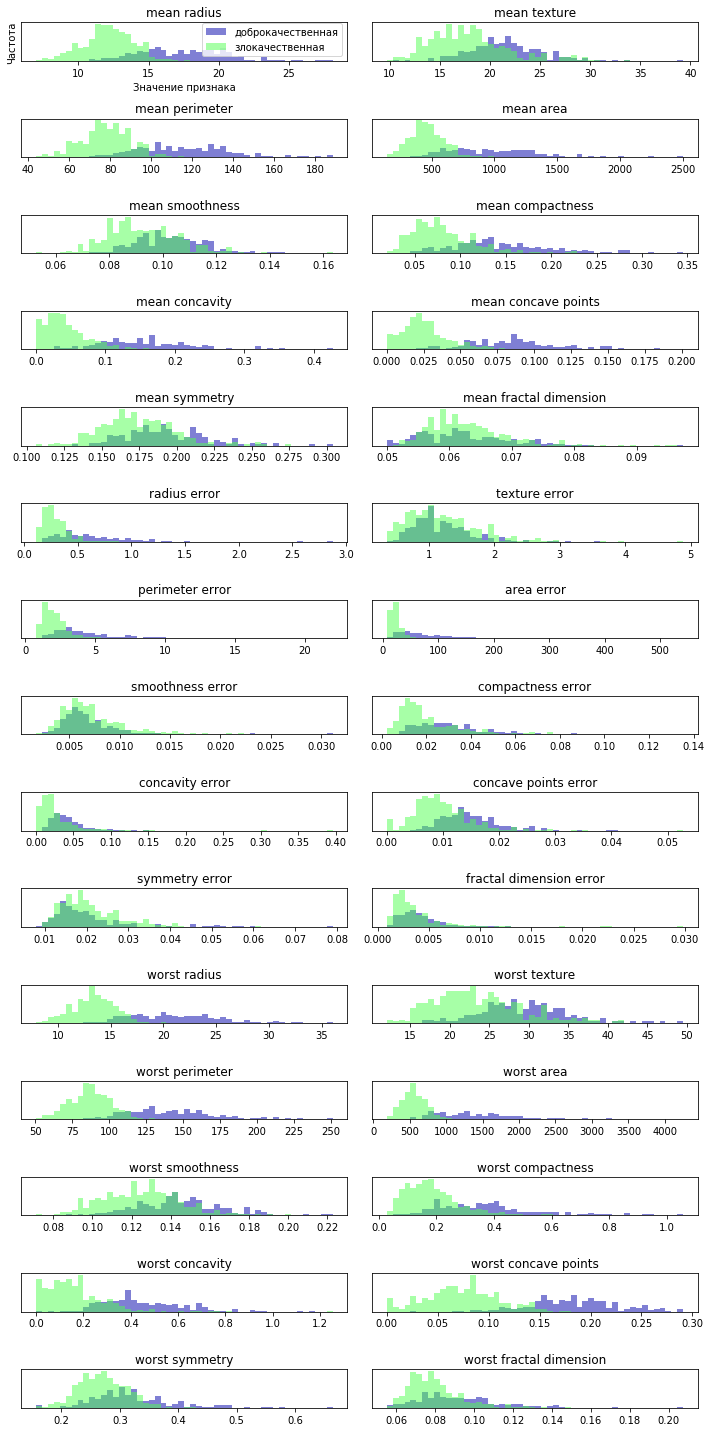

In [8]:
fig, axes = plt.subplots(15, 2, figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel('Значение признака')
ax[0].set_ylabel('Частота')
ax[0].legend(['доброкачественная', "злокачественная"], loc='best')
fig.tight_layout()

In [10]:
scaler = StandardScaler()
scaler.fit (cancer.data)
X_scaled = scaler.transform(cancer.data)

In [11]:
# Оставляем первые две главне компоненты
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)

Text(0,0.5,'Вторая главная компонента')

C:\Sneg\Add.Program\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['Verdena'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


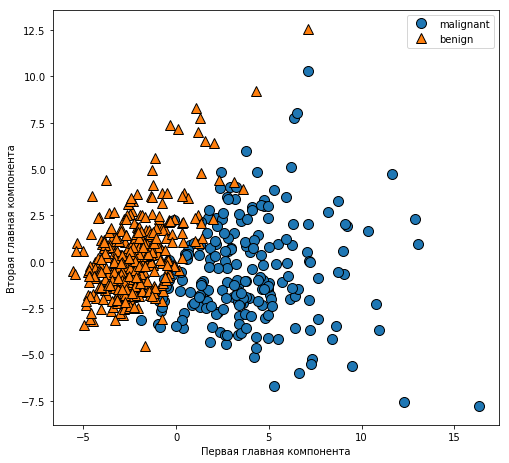

In [13]:
# Строим график первых двух компонент
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')

Text(0,0.5,'Главне компоненты')

C:\Sneg\Add.Program\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['Verdena'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


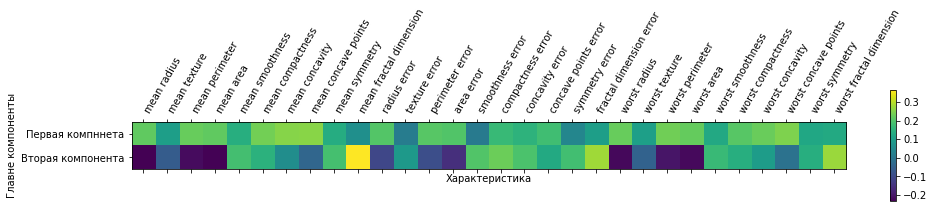

In [14]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ['Первая компннета', 'Вторая компонента'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel('Характеристика')
plt.ylabel('Главне компоненты')

# Метод "собственных лиц" (engenfaces)

C:\Sneg\Add.Program\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['Verdena'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


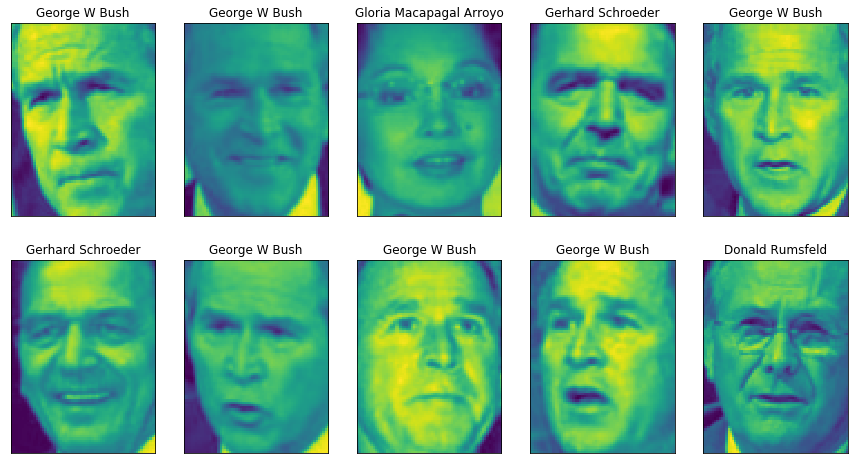

In [30]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks':()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [31]:
# Вычисляем чистоту встречаемости каждого ответа
counts = np.bincount(people.target)
# печатаем частоту рядом с ответами
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print ('{0:25} {1:3}'.format(name, count), end=' ')
    if(i + 1) % 3 == 0:
        print ()

Bill Clinton               29 Donald Rumsfeld           121 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Igor Ivanov                20 
Tiger Woods                23 